# The Sparks Foundation - Intern
# Nirav Tandel
## Task-1 : Predict using supervised ML
### Predict the percentage of a student based on the no. of study hours.

In [1]:
# import the libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# insert the dtaset
url = "http://bit.ly/w-data"
dataset  = pd.read_csv(url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# dataset rows nd columns
dataset.shape

(25, 2)

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# getting information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# check if dataset has null values or not
dataset.isnull == True

False

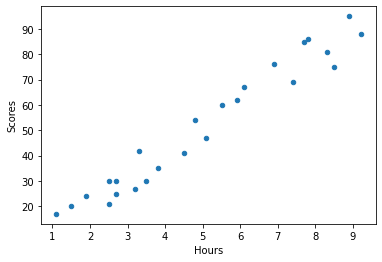

In [7]:
# show the scatter plot for the hours and scpres
dataset.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.show()

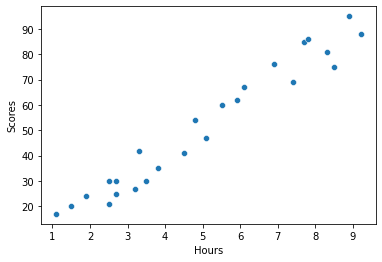

In [8]:
sns.scatterplot(x = 'Hours', y = 'Scores' , data = dataset)
plt.show()

ahere we can see there is fairy linear relationship between two relations

In [9]:
# cor-relationship between the objects
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


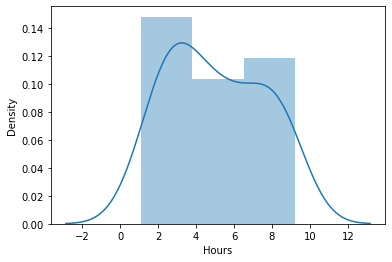

In [10]:
hours = dataset['Hours']
scores = dataset['Scores']
sns.distplot(hours)
plt.show()

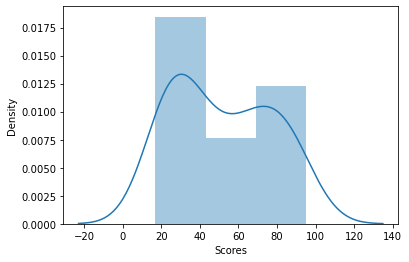

In [11]:
sns.distplot(scores)
plt.show()

# Preparing the data

In [12]:
# dividing our data into attributes and labels
x = dataset.iloc[0:,:-1]
y = dataset.iloc[0:,1]

In [13]:
# splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

# Training the module

In [14]:
# fitting the model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)
print('Training Completed Successfully')

Training Completed Successfully


In [15]:
# plotting the regression line
m = regression.coef_
c = regression.intercept_
line = m*x+c

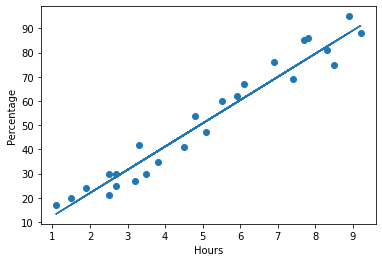

In [16]:
# plotting for the test data
plt.scatter(x,y)
plt.plot(x, line)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

# Making Prediction

In [17]:
y_pred = regression.predict(x_test)
y_pred

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [18]:
# comparing actual value with predicted value
dataframe = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})
dataframe

,Actual,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


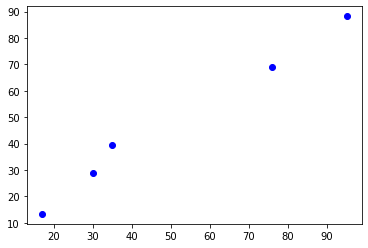

In [19]:
# plotting scatterplot
plt.scatter(x = y_test, y = y_pred, color = 'blue')
plt.show()

In [20]:
# predicting with the own data
hour = float(input("Hours : "))
pred_score = regression.predict([[hour]])
print('score : {}'.format(pred_score))

Hours :  9.25


score : [91.56986604]


# Evaluting the model

In [21]:
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.5916495300630285
